This notebook is an ameliorated creation of mean light curves. 
Using the interpolation method (simple interpolation with interp1D and a smoothing filter (Savitzky golay) with a window f smoothing left to the appreciation of the user), and taking the median of the interpolated light curve, I create a "median LC" 

it's also possible to use a mean light curve, however errors in the interpolation (especially when using one interval for all the light curve, which means pushing extrapolation) 

In [1]:
# from class_fit_bazin_function import * 
%matplotlib inline

from class_separated_fp_explotimin import *

from scipy.signal import savgol_filter
# from matplotlib import rc
# rc('font', **{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

# plt.rcParams['xtick.labelsize']=18
# plt.rcParams['ytick.labelsize']=18

In [2]:
# %matplotlib notebook
# %matplotlib ipympl

In [3]:
save_forcedphot  = '/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/forced_photometry/sample422/lc/'

In [4]:
peaks_andall   = ascii.read('/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/peak_mag/peak_mag_fulinfantsample_01022022.ascii', delimiter=',')
table_infants  = ascii.read('/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/tables/RISNeIIfull_radeczeztexpflashpeakclimb_15022022.csv', delimiter = ',')

In [5]:
# table_infants

In [6]:
standard_SNII  = table_infants[(table_infants['rach-classification']=='SN II')|(table_infants['rach-classification']=='SN IIP')]

In [7]:
# standard_SNII

In [8]:
def generate_LC(candiname, filt, peak):
    '''
    This function generates the LC 

    parameters
    ----------
    candiname [string] 
    filt      [string]
    '''

    la_force_ohoto = save_forcedphot  +  f'{candiname}_fp.ascii' 


    _filt = f'ZTF_{filt}'

    band         = ForcedPhot(la_force_ohoto, _filt , candiname )
    band.correct_lc(correct_unc = True, correct_z = True, correct_ext = True, add_jd_f_texp= True)
    band.add_magnitudes_detvndet_meas()
    band.table   = band.table[(band.table['mag'] <= 21.)|(band.table['mag'] >= 99.)] 
#     band.plot_maglc()
    photable = band.table['tfromexplo_zc','extcorrforcediffimflux','extcorrforcediffimfluxunc','mag','emag','absmag','e_absmag']
    photable.add_row([peak['pday'][0], peak['pflux'][0], 1e-18 ,peak['papmag'][0],0.001 ,peak['pabmag'][0], peak['e_pabmag'][0]])
    photable['mag_normbp'] = photable['mag']-peak['papmag'][0]
    photable['flux_normbp'] = photable['extcorrforcediffimflux']-peak['pflux'][0]
    photable.sort('tfromexplo_zc')

    detec    = photable[photable['mag']!=99.0]
    detec    = detec[(detec['tfromexplo_zc']>=-2)&(detec['tfromexplo_zc']<=300)]

    return detec


In [9]:
#### GENERATING LIGHT CURVE FOR ALL THE SNE II 

for _ in standard_SNII['name']: 
#     print(_)
    rbi     = _ + '_rband'


    peak_r = peaks_andall[(peaks_andall['name']==_)&(peaks_andall['filter']=='r')]

    if len(peak_r)>0:
        _temp_r = generate_LC(_,'r', peak_r)
        globals()[rbi] = _temp_r
        del rbi, _temp_r
        
            
    gbi     = _ + '_gband'
    
    peak_g = peaks_andall[(peaks_andall['name']==_)&(peaks_andall['filter']=='g')]
    if len(peak_g)>0:
        _temp_g = generate_LC(_, 'g', peak_g)
        globals()[gbi] = _temp_g
        del gbi,_temp_g 

vara_FPLC = [ x for x in globals() if str(x).startswith('ZTF') ]




/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)
/Users/r.olivaw/anaconda3/envs/py38astro/lib/python3.8/site-packages/num

In [10]:
vara_FPLC_r = [x for x in vara_FPLC if x.split('_')[-1]=='rband']

In [11]:
vara_FPLC_g = [x for x in vara_FPLC if x.split('_')[-1]=='gband']

# Flashers vs non flashers

In [12]:
weak_2dsub = ascii.read('/Users/r.olivaw/Dropbox (Weizmann Institute)/ASTRO/WIP/Full_RISNeII_ZTF1/tables/WeakFlasher_2dsubsample_07042022.csv')

In [13]:
weak_2dsub = weak_2dsub[weak_2dsub['name']!='ZTF19abueupg']

In [14]:
weak_2dsub

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.

In [15]:
Flash  = weak_2dsub[(weak_2dsub['Flasher']=='yes')|(weak_2dsub['Flasher']=='yes?')]

Nflash = weak_2dsub[weak_2dsub['Flasher']=='no']

In [16]:
Flash

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abdbysy,SN II,yes?,SN IIP,2458295.705,2458294.781,2458296.4,ACAM+WHT,0.9234606,1.6180685,233.535367,56.6968577,0.012122,0.000175,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458334.75,DBSP+P200,-0.9810973016,0.001930022149,2458294.724,1.6760973,-15.49331020545953,0.0331526327068752,16.85753795836716,0.2862893468098687,-14.505103984137875,0.03272188124838144,10.372182527968567,0.3033303606071478,0.011610440903574113,0.0013302220278154035,0.03011464940724035,0.007192822166535693,10.821940937539091,7.09928796409179
ZTF18abeajml,SN II,yes,SN II,2458303.799,2458302.797,2458304.794,SEDm+P60,1.0019,1.99674769,252.03236,24.3040949,0.036526,8.6e-05,2005SDSS4.C...0000:,--,--,yes,yes,notype,yes,2458331.71,SEDm+P60,-0.02632267313,1.331885814,2458303.773,1.02132267,-18.50264443512861,0.015414958320710454,10.42687184147541,1.5013246095658397,-18.549787640366937,0.007498228090990184,7.372101208620604,1.351557480278869,0.0204867406038592,0.0009898916851182882,0.03619533929041421,0.0026608903799914055,6.572604715042432,4.575926693168947
ZTF18abgqvwv,SN II,yes?,SN IIP,2458313.73,2458312.838,2458314.569,ISIS+WHT,0.8915,1.73143,254.316401,31.9631992,0.037726,9.7e-05,2004SDSS3.C...0000:,--,--,no,yes,notype,yes,2458351.82,DBSP+P200,-1.02018285,0.001249450749,2458312.71,1.85918285,-16.814019840514156,0.006961016565343625,16.7395086276049,0.780814570522296,-16.656944283657296,0.030287354900355737,5.723185790692419,0.6022522133450261,-0.002767699609499243,0.0017236495965795575,0.0069464632463789545,0.0022731549446064706,14.424816825463473,4.47988680579762
ZTF18abokyfk,SN II,yes,SN II,2458350.89,2458349.901,2458352.006,DBSP+P200,0.9891898,2.10471592,2.360629,47.3540827,0.017189,3.3e-05,1999ApJS..121..287H,--,--,yes,yes,Sbc,yes,2458470.335,ACAM+WHT,-0.01311684685,0.00810257263,2458350.877,1.12911685,-17.17781792076166,0.008184648340751678,14.129301377718392,1.0319524497021388,-17.01907663711989,0.0332647297080407,10.042441351563802,1.685214752840058,0.005844303818708419,0.0014540596351276867,0.026480640502759393,0.0014649410130147898,10.31568752100516,6.276399839859646
ZTF18abwlsoi,SN II,yes,SN II,2458377.63,2458376.74,2458377.751,SEDm+P60,0.8952,1.0131723,261.897614,71.530251,0.05376479944,0.007318710553,meas,2458443.6,SEDm+P60,no,yes,--,yes,2458443.6,SEDm+P60,-0.02146235453,0.002665623404,2458377.609,0.14246235,-18.518220748706636,0.29569547023108217,6.291511375496778,0.3851094457398963,-18.581476347170103,0.2963036637351274,4.884686383300792,0.285709373570058,0.031614797151004376,0.008121157616170814,0.045954074587724325,0.007425436176296284,4.868515110202693,3.165895028481702
ZTF19abqhobb,SN II,yes,SN II,2458714.663,2458713.742,2458714.792,SEDm+P60,0.9213,1.0508631,261.4111,59.4467303,0.01815,1e-05,2006AJ....132..231P,--,--,yes,yes,Scd( f ),yes,2458878.71,ALFOSC+NOT,-0.0379833268,0.00608132416,2458714.625,0.16698333,-17.64125267005545,0.00866796071694527,8.582697522693397,0.5669372272342655,-17.465368004847953,0.019635823367565336,7.682337884769271,1.2202711183018025,0.010103578145785736,0.0007073497740846882,0.02204664496274497,0.0014619438297216788,7.833160915760206,4.327674459143019
ZTF19acryurj,SN II,yes,SN II,2458800.79,2458799.805,2458801.991,GMOS+Gemini,0.9845,2.18556632,13.5933959,31.6701819,0.022035,3e

In [17]:
Nflash

name,rach-classification,Flasher,classification,First Detection,Last Non Detection,First Spectrum,instrument-fs,fD-lND,fS-lND,ra_med,dec_med,redshift,e_redshift,z_ref,jd-redshift,instrument-redshift,UV,host,host_type,P-cygni,jd-pcyg,instrument-pcyg,t_exp,e_t_exp,jd_t_exp,Fs-Texp,peakabsmag_r,e_peakabsmag_r,peakday_r,e_peakday_r,peakabsmag_g,e_peakabsmag_g,peakday_g,e_peakday_g,decline_r,e_decline_r,decline_g,e_decline_g,climb_time_r,climb_time_g
str12,str5,str4,str6,float64,float64,float64,str11,float64,float64,float64,float64,float64,float64,str19,float64,str10,str3,str3,str9,str4,float64,str10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
ZTF18abckutn,SN II,no,SN IIP,2458289.865,2458289.758,2458290.748,DBSP+P200,0.1074884,0.99028249,237.026897,55.7148553,0.040705,0.000123,1999PASP..111..438F,--,--,yes,yes,notype,yes,2458307.69,DBSP+P200,-0.1069391354,0.01501290292,2458289.758,0.98993913,-17.489833262081575,0.00961684735079223,16.19256326104363,0.29419405502410373,-17.511123656906882,0.014952041887626596,9.522573088435623,0.6234607506231766,0.008576205724715288,0.001859420359141762,0.029699745465459428,0.0059168450289302996,9.330205161421391,6.232506273806587
ZTF18acqwdla,SN II,no,SN II,2458443.874,2458443.789,2458443.937,SEDm+P60,0.0855324,0.1481347,106.472662,12.8929375,0.026212141,0.004739291488,meas,2458616.456,EFOSC2+NTT,no,yes,--,yes,2458616.456,EFOSC2+NTT,-0.04249999998,0.04249999998,2458443.832,0.1055,-18.60137684700958,0.39262836644613214,12.183829851753528,1.2991954919750475,-18.754296156407,0.39288470141123233,11.513745758265994,0.38590822695090043,0.01596825397963348,0.0006413914572852468,0.03923859349765954,0.0008299446480697324,99.0,99.0
ZTF20aasijew,SN II,no,SN II,2458912.958,2458912.05,2458913.883,SEDm+P60,0.9078356,1.8329015,216.905399,69.6864096,0.030074,0.000143,1999PASP..111..438F,--,--,yes,yes,SB( r )b,no?,2458939.73,SEDm+P60,-0.4540000004,0.4540000001,2458912.504,1.379,-17.551070668914477,0.01088077673062743,15.084002527197475,0.4646181670871612,99.0,99.0,99.0,99.0,0.0332274252705501,0.00196996316182331,99.0,99.0,99.0,99.0
ZTF20abfcdkj,SN II,no,SN II,2459013.75,2459012.82,2459015.0,GMOS+Gemini,0.9342,2.26059114,281.793965,60.4968018,0.05791714076,0.01083013884,meas,2459032.607,ALFOSC+NOT,yes,yes,--,yes,2459033.0,ALFOSC+NOT,-0.04948199798,0.007785345089,2459013.701,1.299482,-18.133900357482435,0.40617030183954944,15.059195936150012,0.7177939336865377,-18.08678188554342,0.40637722108978397,10.900480613206733,0.8449487500290667,0.00970984174913531,0.002348876267753915,0.025832792517778237,0.004240091807650365,11.62110115953528,6.141094110446522
ZTF20abqkaoc,SN II,no,SN II,2459067.78,2459066.8,2459068.0,SPRAT+LT,0.9785,1.6040925,250.983335,77.879897,0.05471561806,0.002772355382,meas,2459075.5,DBSP+P200,yes,yes,--,yes,2459083.0,ALFOSC+NOT,-0.4899999998,0.49,2459067.29,0.71,-18.395962911287413,0.13310995822771887,10.832546170926655,0.5895848438055468,99.0,99.0,99.0,99.0,0.018447448005717453,0.0019185363956680853,99.0,99.0,99.0,99.0
ZTF20acfdmex,SN II,no,SN II,2459118.848,2459117.861,2459120.565,SPRAT+LT,0.9877778,2.7045834,28.1887405,36.6231594,0.018413,0.00014,1991RC3.9.C...0000d,--,--,yes,yes,SAB(rs)c,yes,2459133.811,SEDm+P60,-0.002126854999,0.00514396114,2459118.846,1.71912685,-16.775620819801787,0.016844083324413176,18.615381095482796,1.4621491374577071,-16.868473375781043,0.02043239604115501,7.190153704892142,0.7276825167056561,0.0015743278494891612,0.0007397307956498636,0.020517511177230222,0.0017355938582289381,10.10934718583829,4.414348290407204
ZTF20acuaqlf,SN II,no,SN II,2459181.608,2459179.671,2459182.58,SEDm+P60,1.9369,2.9093748,357.775211,6.9424927,0.01687162048,0.001183141989,meas,2459185.825,FTN+FLOYDS,no,yes,--,yes?,2459185.82,FLOYDS+FTN,-0.2344647215,0.05977340656,2459181.374,1.20646472,-16.65719327083771,0.15277339720004107,24.75632772110278,1.9278644772404734,-16.526599375589242,0.15236759625426

In [18]:
# for _ in weak_2dsub['name']: 
# #     print(_)
#     rbi     = _ + '_rband'


#     peak_r = peaks_andall[(peaks_andall['name']==_)&(peaks_andall['filter']=='r')]

#     if len(peak_r)>0:
#         _temp_r = generate_LC(_,'r', peak_r)
#         globals()[rbi] = _temp_r
#         del rbi, _temp_r
        
            
#     gbi     = _ + '_gband'
    
#     peak_g = peaks_andall[(peaks_andall['name']==_)&(peaks_andall['filter']=='g')]
#     if len(peak_g)>0:
#         _temp_g = generate_LC(_, 'g', peak_g)
#         globals()[gbi] = _temp_g
#         del gbi,_temp_g 

# vara_FPLC = [ x for x in globals() if str(x).startswith('ZTF') ]




In [19]:
## plotting the SN of Sondos
# already corrected for MW extinction
sondos_21bij = ascii.read('r_band_data_21bik_sondos.txt')


In [20]:
sondos_21bij['t_fromtexp'] = sondos_21bij['mjd'] - 58876.63

In [21]:
sondos_21bij['mag_norm'] = sondos_21bij['absmag'] -  min(sondos_21bij['absmag'])

In [22]:
sondos_21bij

mjd,filter,mag,dmag,absmag,source,nondet,t_fromtexp,mag_norm
float64,str2,float64,float64,float64,str11,str5,float64,float64
58878.26529,rp,17.84788283,0.01568655,-15.78809226,Las Cumbres,FALSE,1.6352900000056252,0.6062125299999988
58878.26698,rp,17.84601243,0.016219366,-15.78996266,Las Cumbres,FALSE,1.63698000000295,0.6043421299999991
58879.30703,rp,17.72759014,0.017407953,-15.90838495,Las Cumbres,FALSE,2.677030000006198,0.4859198399999993
58879.30873,rp,17.71850824,0.018735977,-15.91746685,Las Cumbres,FALSE,2.678729999999632,0.47683793999999935
58881.1553,rp,17.45827038,0.016793899,-16.17770471,Las Cumbres,FALSE,4.5253000000011525,0.2166000799999992
58881.15699,rp,17.47321268,0.016793899,-16.16276241,Las Cumbres,FALSE,4.526990000005753,0.2315423800000005
58883.04995,rp,17.3627502,0.016795908,-16.27322489,Las Cumbres,FALSE,6.419950000003155,0.12107989999999802
58883.05164,rp,17.3636192,0.017409839,-16.27235589,Las Cumbres,FALSE,6.42164000000048,0.12194889999999958
58884.15274,rp,17.32738106,0.01873589,-16.30859403,Las Cumbres,FALSE,7.52274000000034,0.08571076000000133


In [51]:
sondos_21bij[sondos_21bij['absmag']== min(sondos_21bij['absmag'])]['mjd']

58889.36178


In [23]:
sondos_21bij['t_frompeak'] = sondos_21bij['mjd'] - 58889.36178

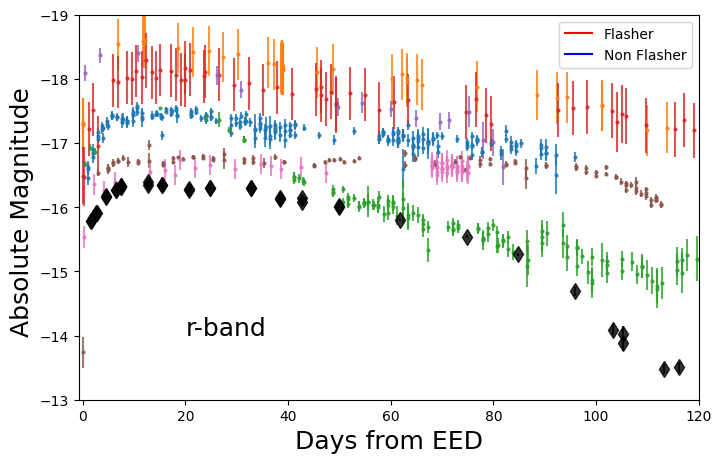

In [53]:
## R BAND

fig0,ax0 = plt.subplots(1,1,figsize = (5*1.6,5) )


# for _ in Flash['name']:
# #     print(_)
    
#     lc_r = globals().get(_+'_rband')

#     if len(lc_r) != 0:
#         globals()['rmagztfplot_'+_] = ax0.errorbar(lc_r['tfromexplo_zc'], lc_r['absmag'], lc_r['e_absmag'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)

for _ in Nflash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')

    if lc_r is not None :
        if len(lc_r) != 0 :
            globals()['rmagztfplot_'+_] = ax0.errorbar(lc_r['tfromexplo_zc'], lc_r['absmag'], lc_r['e_absmag'],
                                                             fmt = 'o', ms = 2,alpha = 0.8)
            
    ax0.set_ylabel('Absolute Magnitude ', size = 18)
#     ax3.set_ylabel('Absolute Magnitude', size = 15)


ax0.errorbar(sondos_21bij['t_fromtexp'], sondos_21bij['absmag'], sondos_21bij['dmag'],
                                                             fmt = 'd', ms = 8,alpha = 0.8, color = 'black')


plt.plot(-3,0, color = 'red', label = 'Flasher')
plt.plot(-3,0, color = 'blue', label = 'Non Flasher')

plt.xlabel('Days from EED', size = 18)
plt.xlim([-0.8,120])
plt.ylim([-19,-13])

plt.legend()

plt.text(20,-14,'r-band', size = 18)

plt.gca().invert_yaxis()


## NORMALISED light curve comaprison

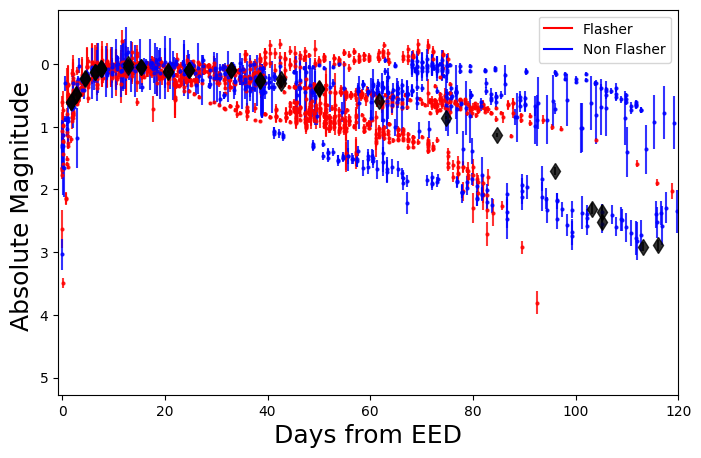

In [54]:
## R BAND

fig0,ax0 = plt.subplots(1,1,figsize = (5*1.6,5) )


for _ in Flash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')

    if len(lc_r) != 0:
        globals()['rmagztfplot_'+_] = ax0.errorbar(lc_r['tfromexplo_zc'], lc_r['mag_normbp'], lc_r['e_absmag'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'red')

for _ in Nflash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')

    if lc_r is not None :
        if len(lc_r) != 0 :
            globals()['rmagztfplot_'+_] = ax0.errorbar(lc_r['tfromexplo_zc'], lc_r['mag_normbp'], lc_r['e_absmag'],
                                                             fmt = 'o', ms = 2,alpha = 0.8, color = 'blue')
            
    ax0.set_ylabel('Absolute Magnitude ', size = 18)
#     ax3.set_ylabel('Absolute Magnitude', size = 15)


ax0.errorbar(sondos_21bij['t_fromtexp'], sondos_21bij['mag_norm'], sondos_21bij['dmag'],
                                                             fmt = 'd', ms = 8,alpha = 0.8, color = 'black')


plt.plot(-3,0, color = 'red', label = 'Flasher')
plt.plot(-3,0, color = 'blue', label = 'Non Flasher')

plt.xlabel('Days from EED', size = 18)
plt.xlim([-0.8,120])
# plt.ylim([-19,-13])

plt.legend()

# plt.text(20,-14,'r-band', size = 18)

plt.gca().invert_yaxis()


In [24]:
def interpolate_fullLC_with_errors(t,mag,emag,mininterp,maxinterp,len_interpo = 1000, plot=False):
    '''
    this function interpolates the lightcurve prior to smoothing withSG filter
    Recommend to cut the lightcurve to <150 days 


    parameters
    ----------
    t           [column/array] original column/array of time
    mag         [column/array] original column/array of magnitudes
    emag        [column/array] original column/array of errors on magnitudes
    peaktg      [float] time of peak g. We're adding this specific point to calculate the color at peak g /!\\\\ 
    len_interpo [int] -optional- len of the interpolated light curve. Can be changed according to number of points
    plot        [bool] -optional- plot the lightcurve to visualise the interpolation
    
    
    returns
    -------
    Table containaing 
    array of time, array of interpolated magnitudes, array of interpolated errors on magnitude
    
    '''
    


    interp_mag  = interp1d(t, mag,   bounds_error=False ,fill_value='extrapolate')
    interp_emag = interp1d(t, emag,   bounds_error=False,fill_value='extrapolate') ##interpolating errors 

    interp_t   = np.linspace(mininterp, maxinterp, len_interpo)
    interp_t.sort()

    if plot is True:
        
        plt.figure()

        h = plt.plot(t, mag, color = 'grey', alpha = 0.8 )
        plt.fill_between(t,mag + np.sqrt(emag), mag - np.sqrt(emag), 
                 alpha=0.5, color=h[0].get_color())

        i = plt.plot(interp_t, interp_mag(interp_t), color = 'gold', alpha = 0.8 )
        plt.fill_between(interp_t, interp_mag(interp_t) + np.sqrt(interp_emag(interp_t)), interp_mag(interp_t) - np.sqrt(interp_emag(interp_t)), 
                 alpha=0.4, color=i[0].get_color())


        plt.gca().invert_yaxis()
        plt.xlabel('Time from FD')
        plt.ylabel('App. Mag')
        
    table = Table(data = ([interp_t, interp_mag(interp_t), interp_emag(interp_t)]), names = ('t_fromtexp','mag','magerr'))
    return table


def smoothing_sg_simple(interpolated_lc,window_length):
    '''
    This function smoothes the interpolation without considering different parts and different windows of smoothing/
    grains of smoothing

    parameters
    ---------


    return
    ------


    '''

    full_sg   = savgol_filter(interpolated_lc['mag']   , window_length,3)
    e_full_sg = savgol_filter(interpolated_lc['magerr'], window_length,3)

    return full_sg,e_full_sg




def interpolate_and_smooth_per_phase(phase_x, min_interp, max_interp, smoothing_window = 200, normalised = True):
    
#     min_interp = min(phase_x['t_fromfd'])
#     max_interp = max(phase_x['t_fromfd'])

#                                        phase_x['absmag'],
    if normalised is True : 
    
        if max_interp>max(phase_x['tfromexplo_zc']):
            interp_phasex = interpolate_fullLC_with_errors(phase_x['tfromexplo_zc'], 
                                           phase_x['mag_normbp'] ,            
                                           phase_x['emag'],min_interp,max(phase_x['tfromexplo_zc']), plot=False)
        else:
            interp_phasex = interpolate_fullLC_with_errors(phase_x['tfromexplo_zc'], 
                                       phase_x['mag_normbp'], 
                                       phase_x['emag'],min_interp, max_interp, plot=False)
            
    elif normalised is False:
        
        if max_interp>max(phase_x['tfromexplo_zc']):
            interp_phasex = interpolate_fullLC_with_errors(phase_x['tfromexplo_zc'], 
                                           phase_x['absmag'] ,            
                                           phase_x['emag'],min_interp,max(phase_x['tfromexplo_zc']), plot=False)
        else:
            interp_phasex = interpolate_fullLC_with_errors(phase_x['tfromexplo_zc'], 
                                       phase_x['absmag'], 
                                       phase_x['emag'],min_interp, max_interp, plot=False)
        
        
        
    
    smooth_m,smooth_em = smoothing_sg_simple(interp_phasex,smoothing_window)
    
    interp_phasex['smooth_mag']    = smooth_m
    interp_phasex['smooth_magerr'] = smooth_em
    
    return interp_phasex
    
    
    
    

## WITH THE MEAN LIGHT CURVE 

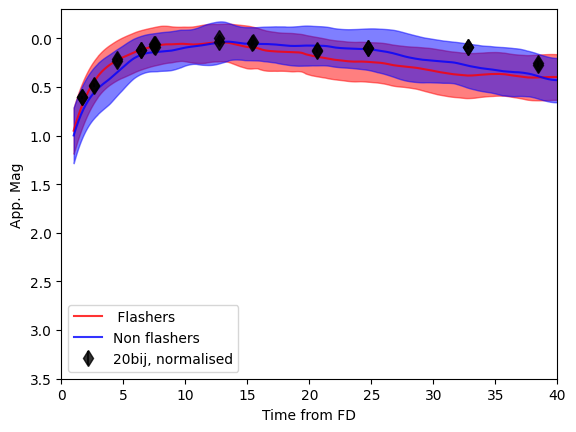

In [72]:
###

plt.figure()


mag_meanf   = list(np.zeros(1000))
emag_meanf  = list(np.zeros(1000))

for _ in Flash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,1,40,100)


    mag_meanf  = mag_meanf  + interp_phase_r['smooth_mag'] 
    emag_meanf = emag_meanf + interp_phase_r['smooth_magerr'] 
   
    
#     plt.errorbar(lc_r['tfromexplo_zc'], lc_r['absmag'], lc_r['e_absmag'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)
    
#     h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
#     plt.fill_between(interp_phase_r['t_fromtexp'],
#                      interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
#                      interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
#                  alpha=0.5, color=h[0].get_color())
    

mag_meanf /= len(Flash['name']) 
emag_meanf/= len(Flash['name'])  

j = plt.plot(interp_phase_r['t_fromtexp'],mag_meanf, color = 'red', alpha = 0.8, label = ' Flashers' )
plt.fill_between(interp_phase_r['t_fromtexp'],
                mag_meanf + np.sqrt(emag_meanf),
                mag_meanf - np.sqrt(emag_meanf), 
                 alpha=0.5, color=j[0].get_color())
 

    
    
    
    
###NON FLASHER 

mag_meannf   = list(np.zeros(1000))
emag_meannf  = list(np.zeros(1000))

for _ in Nflash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,1,40,100)


    mag_meannf  = mag_meannf  + interp_phase_r['smooth_mag'] 
    emag_meannf = emag_meannf + interp_phase_r['smooth_magerr'] 
   
    
#     plt.errorbar(lc_r['tfromexplo_zc'], lc_r['absmag'], lc_r['e_absmag'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)
    
#     h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
#     plt.fill_between(interp_phase_r['t_fromtexp'],
#                      interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
#                      interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
#                  alpha=0.5, color=h[0].get_color())
    

mag_meannf /= len(Nflash['name']) 
emag_meannf/= len(Nflash['name'])  

j = plt.plot(interp_phase_r['t_fromtexp'],mag_meannf, color = 'blue', alpha = 0.8 , label = 'Non flashers')
plt.fill_between(interp_phase_r['t_fromtexp'],
                mag_meannf + np.sqrt(emag_meannf),
                mag_meannf - np.sqrt(emag_meannf), 
                 alpha=0.5, color=j[0].get_color())
 

    
plt.errorbar(sondos_21bij['t_fromtexp'], sondos_21bij['mag_norm'], sondos_21bij['dmag'],
                                                             fmt = 'd', ms = 8,alpha = 0.8, color = 'black',
            label = '20bij, normalised')

    
    
  
plt.ylim([-0.3,3.5])    
plt.xlim([0,40])    
plt.gca().invert_yaxis()
plt.xlabel('Time from FD')
plt.ylabel('App. Mag')

plt.legend( )


idea: create a mean light curve of flashers and non flashers, compare to sondos' one + 


to do so, need to interpolate and smooth 

## WITH THE MEDIAN LIGHT CURVE 

#### change the x scale to time from peak mag 

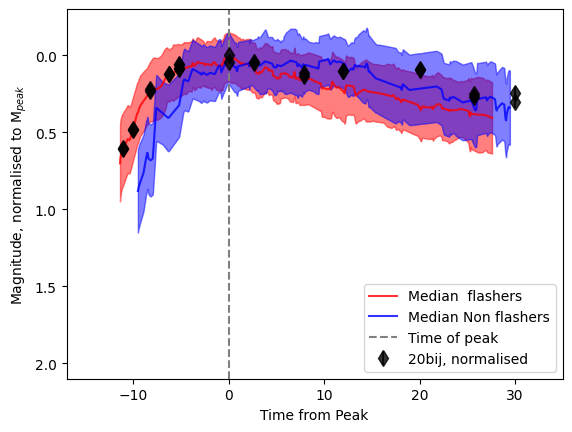

In [70]:
###

plt.figure()


magnis_flash   = Table()
e_magnis_flash = Table()


for _ in Flash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,1,40,10)


      #Collecting the smoothed LCs
    magnis_flash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_flash.add_column(interp_phase_r['smooth_magerr'], name=_)
    
    
    #Plotting all the LC and smoothed mag light curves
#     plt.errorbar(lc_r['tfromexplo_zc'], lc_r['absmag'], lc_r['e_absmag'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)
    
#     h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
#     plt.fill_between(interp_phase_r['t_fromtexp'],
#                      interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
#                      interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
#                  alpha=0.5, color=h[0].get_color())
    

# Making the median LC
median_magnis_flash = []
emed_magnis_flash = []

for i in range(len(magnis_flash)):
    median_magnis_flash.append(np.median(list(magnis_flash[i])))

for i in range(len(e_magnis_flash)):
    emed_magnis_flash.append(np.median(list(e_magnis_flash[i])))


median_flash_LC =  Table([interp_phase_r['t_fromtexp'],median_magnis_flash,emed_magnis_flash],
                         names=['t_fromtexp','mag_norm','magerr'] )

peak_time = median_flash_LC[median_flash_LC['mag_norm']== min(median_flash_LC['mag_norm'])]['t_fromtexp']

median_flash_LC['t_frompeak'] = median_flash_LC['t_fromtexp'] - peak_time


r = plt.plot(median_flash_LC['t_frompeak'], median_flash_LC['mag_norm'], color = 'red', alpha = 0.8 , label = 'Median  flashers')
plt.fill_between(median_flash_LC['t_frompeak'],
                median_flash_LC['mag_norm'] + np.sqrt(median_flash_LC['magerr']),
                median_flash_LC['mag_norm'] - np.sqrt(median_flash_LC['magerr']), 
                 alpha=0.5, color=r[0].get_color())
 

    
    
    
    
    
###NON FLASHER 

magnis_nflash   = Table()
e_magnis_nflash = Table()

for _ in Nflash['name']:
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,1,40,10)
    
    #Collecting the smoothed LCs
    magnis_nflash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_nflash.add_column(interp_phase_r['smooth_magerr'], name=_)


    # Plotting all the smoothed LC
#     h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
#     plt.fill_between(interp_phase_r['t_fromtexp'],
#                      interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
#                      interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
#                  alpha=0.5, color=h[0].get_color())


# Making the median LC
median_magnis_nflash = []
emed_magnis_nflash = []

for i in range(len(magnis_nflash)):
    median_magnis_nflash.append(np.median(list(magnis_nflash[i])))

for i in range(len(e_magnis_nflash)):
    emed_magnis_nflash.append(np.median(list(e_magnis_nflash[i])))
    

median_Nflash_LC =  Table([interp_phase_r['t_fromtexp'],median_magnis_nflash,emed_magnis_nflash],
                         names=['t_fromtexp','mag_norm','magerr'] )

peak_time2 = median_Nflash_LC[median_Nflash_LC['mag_norm']== min(median_Nflash_LC['mag_norm'])]['t_fromtexp']

median_Nflash_LC['t_frompeak'] = median_Nflash_LC['t_fromtexp'] - peak_time2


r = plt.plot(median_Nflash_LC['t_frompeak'], median_Nflash_LC['mag_norm'], color = 'blue', alpha = 0.8 , label = 'Median Non flashers')
plt.fill_between(median_Nflash_LC['t_frompeak'],
                median_Nflash_LC['mag_norm'] + np.sqrt(median_Nflash_LC['magerr']),
                median_Nflash_LC['mag_norm'] - np.sqrt(median_Nflash_LC['magerr']), 
                 alpha=0.5, color=r[0].get_color())
 

    
    
#### SONDOS SN
    
plt.errorbar(sondos_21bij['t_frompeak'], sondos_21bij['mag_norm'], sondos_21bij['dmag'],
                                                             fmt = 'd', ms = 8,alpha = 0.8, color = 'black',
            label = '20bij, normalised')


plt.axvline(0,ls= '--', color = 'grey',label = 'Time of peak')
    
  
plt.ylim([-0.3,2.1])    
plt.xlim([-17,35])    
plt.gca().invert_yaxis()
plt.xlabel('Time from Peak')
plt.ylabel('Magnitude, normalised to M$_{peak}$')

plt.legend( )


## TODO: I think the peak magnitude is a bad metric in those cases, it is better to use the time of "climg" when the LC reaches a certain slope. There should be a better emtric than peak of even climb time to look at these lightcurve. TO look for then there's a change of slope mnaybe? 


## Checking each interpolation and median light curve 

## Non flasher, normalised magnitude

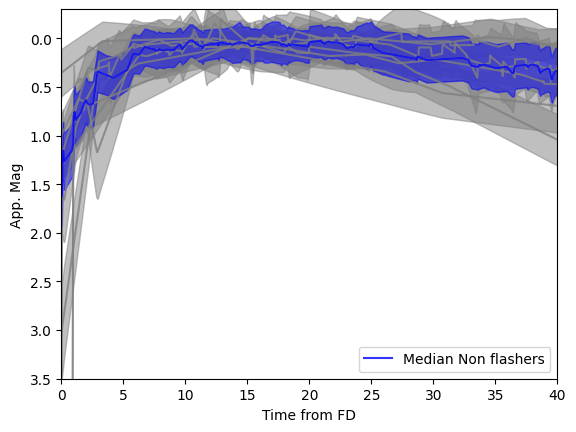

In [58]:

plt.figure()
###NON FLASHER 

# mag_meannf   = list(np.zeros(1000))
# emag_meannf  = list(np.zeros(1000))


magnis_nflash   = Table()
e_magnis_nflash = Table()

for _ in Nflash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,0.,40,10)
    magnis_nflash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_nflash.add_column(interp_phase_r['smooth_magerr'], name=_)


#     mag_meannf  = mag_meannf  + interp_phase_r['smooth_mag'] 
#     emag_meannf = emag_meannf + interp_phase_r['smooth_magerr'] 
    
    
    
#     plt.errorbar(lc_r['tfromexplo_zc'], lc_r['mag_normbp'], lc_r['e_absmag'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)
    
    h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
    plt.fill_between(interp_phase_r['t_fromtexp'],
                     interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
                     interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
                 alpha=0.5, color=h[0].get_color())
    

# mag_meannf /= len(Nflash['name']) 
# emag_meannf/= len(Nflash['name']) 


median_magnis_nflash = []
emed_magnis_nflash = []

for i in range(len(magnis_nflash)):
    median_magnis_nflash.append(np.median(list(magnis_nflash[i])))

for i in range(len(e_magnis_nflash)):
    emed_magnis_nflash.append(np.median(list(e_magnis_nflash[i])))
    


r = plt.plot(interp_phase_r['t_fromtexp'], median_magnis_nflash, color = 'blue', alpha = 0.8 , label = 'Median Non flashers')
plt.fill_between(interp_phase_r['t_fromtexp'],
                median_magnis_nflash + np.sqrt(emed_magnis_nflash),
                median_magnis_nflash - np.sqrt(emed_magnis_nflash), 
                 alpha=0.5, color=r[0].get_color())
 

    
    


plt.ylim([-0.3,3.5])    
plt.xlim([0,40])    
plt.gca().invert_yaxis()
plt.xlabel('Time from FD')
plt.ylabel('App. Mag')

plt.legend( )

# j = plt.plot(interp_phase_r['t_fromtexp'],mag_meannf, color = 'blue', alpha = 0.8 , label = 'Non flashers')
# plt.fill_between(interp_phase_r['t_fromtexp'],
#                 mag_meannf + np.sqrt(emag_meannf),
#                 mag_meannf - np.sqrt(emag_meannf), 
#                  alpha=0.5, color=j[0].get_color())
 


In [65]:
# cunt = globals().get('ZTF18abckutn_rband')
# plt.figure()
# plt.plot(cunt['tfromexplo_zc'],cunt['absmag'], '.r')

# interp_phase_r = interpolate_and_smooth_per_phase(cunt,0.5,40,10, normalised = False)


# h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['smooth_mag'], color = 'grey', alpha = 0.8 )

# plt.fill_between(interp_phase_r['t_fromtexp'],
#                      interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
#                      interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
#                  alpha=0.5, color=h[0].get_color())
# plt.ylim([-19,-15])
# plt.gca().invert_yaxis()



## Non normalised 

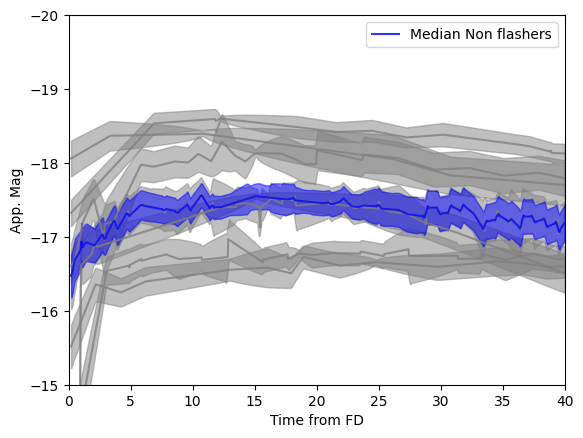

In [70]:

plt.figure()
###NON FLASHER 

# mag_meannf   = list(np.zeros(1000))
# emag_meannf  = list(np.zeros(1000))


magnis_nflash   = Table()
e_magnis_nflash = Table()

for _ in Nflash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,0.2,40,10, normalised = False)
    magnis_nflash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_nflash.add_column(interp_phase_r['smooth_magerr'], name=_)


#     mag_meannf  = mag_meannf  + interp_phase_r['smooth_mag'] 
#     emag_meannf = emag_meannf + interp_phase_r['smooth_magerr'] 
    
    
    
#     plt.errorbar(lc_r['tfromexplo_zc'], lc_r['mag_normbp'], lc_r['e_absmag'],
#                                                              fmt = 'o', ms = 2,alpha = 0.8)
    
    h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
    plt.fill_between(interp_phase_r['t_fromtexp'],
                     interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
                     interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
                 alpha=0.5, color=h[0].get_color())
    

# mag_meannf /= len(Nflash['name']) 
# emag_meannf/= len(Nflash['name']) 
# magnis_nflash.add_column(interp_phase_r['t_fromtexp'], name = 't_ftex')

median_magnis_nflash = []
emed_magnis_nflash = []

for i in range(len(magnis_nflash)):
    
    cleaned_mag = [x for x in list(magnis_nflash[i]) if str(x) != 'nan']
    median_magnis_nflash.append(np.median(cleaned_mag))
#     print(cleaned_mag)

for i in range(len(e_magnis_nflash)):
    
    cleaned_emag = [x for x in list(e_magnis_nflash[i]) if str(x) != 'nan']
    emed_magnis_nflash.append(np.median(cleaned_emag))
    


r = plt.plot(interp_phase_r['t_fromtexp'], median_magnis_nflash, color = 'blue', alpha = 0.8 , label = 'Median Non flashers')
plt.fill_between(interp_phase_r['t_fromtexp'],
                median_magnis_nflash + np.sqrt(emed_magnis_nflash),
                median_magnis_nflash - np.sqrt(emed_magnis_nflash), 
                 alpha=0.5, color=r[0].get_color())
 

    
    


plt.ylim([-20,-15])    
plt.xlim([0,40])    
plt.gca().invert_yaxis()
plt.xlabel('Time from FD')
plt.ylabel('App. Mag')

plt.legend( )

# j = plt.plot(interp_phase_r['t_fromtexp'],mag_meannf, color = 'blue', alpha = 0.8 , label = 'Non flashers')
# plt.fill_between(interp_phase_r['t_fromtexp'],
#                 mag_meannf + np.sqrt(emag_meannf),
#                 mag_meannf - np.sqrt(emag_meannf), 
#                  alpha=0.5, color=j[0].get_color())
 


## Flasherm, median light curve, non-normalised

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ZTF18abdbysy
ZTF18abeajml
ZTF18abgqvwv
ZTF18abokyfk


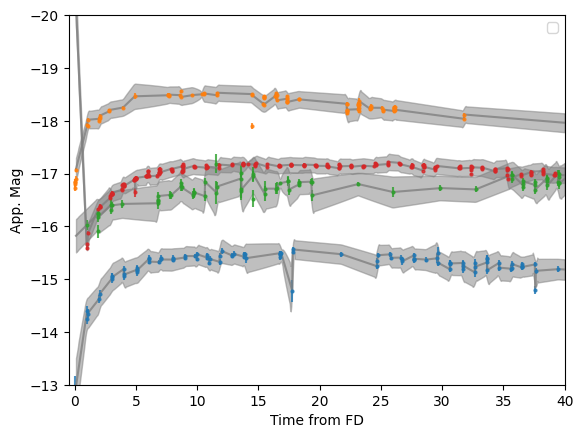

In [58]:

plt.figure()
##FLASHER 

# mag_meannf   = list(np.zeros(1000))
# emag_meannf  = list(np.zeros(1000))


magnis_flash   = Table()
e_magnis_flash = Table()

for _ in Flash['name'][:4]:
    print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,0.1,40,10, normalised = False)
    
    magnis_flash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_flash.add_column(interp_phase_r['smooth_magerr'], name=_)


#     mag_meannf  = mag_meannf  + interp_phase_r['smooth_mag'] 
#     emag_meannf = emag_meannf + interp_phase_r['smooth_magerr'] 
    
    
    
    plt.errorbar(lc_r['tfromexplo_zc'], lc_r['absmag'], lc_r['e_absmag'],
                                                             fmt = 'o', ms = 2,alpha = 0.8)
    
    h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
    plt.fill_between(interp_phase_r['t_fromtexp'],
                     interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
                     interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
                 alpha=0.5, color=h[0].get_color())
    

# mag_meannf /= len(Nflash['name']) 
# emag_meannf/= len(Nflash['name']) 


median_magnis_flash = []
emed_magnis_flash = []

for i in range(len(magnis_flash)):
    
#     cleaned_mag = [x for x in list(magnis_flash[i]) if str(x) != 'nan']
    median_magnis_flash.append(np.median(list(magnis_flash[i])))
    

for i in range(len(e_magnis_flash)):
    emed_magnis_flash.append(np.median(list(e_magnis_flash[i])))
    


# r = plt.plot(interp_phase_r['t_fromtexp'], median_magnis_flash, color = 'red', alpha = 0.8 , label = 'Median Non flashers')
# plt.fill_between(interp_phase_r['t_fromtexp'],
#                 median_magnis_flash + np.sqrt(emed_magnis_flash),
#                 median_magnis_flash - np.sqrt(emed_magnis_flash), 
#                  alpha=0.5, color=r[0].get_color())
 

    
    


plt.ylim([-20,-13])    
plt.xlim([-0.5,40])    
plt.gca().invert_yaxis()
plt.xlabel('Time from FD')
plt.ylabel('App. Mag')

plt.legend( )

# j = plt.plot(interp_phase_r['t_fromtexp'],mag_meannf, color = 'blue', alpha = 0.8 , label = 'Non flashers')
# plt.fill_between(interp_phase_r['t_fromtexp'],
#                 mag_meannf + np.sqrt(emag_meannf),
#                 mag_meannf - np.sqrt(emag_meannf), 
#                  alpha=0.5, color=j[0].get_color())
 


## Should remove ablygy because it's a heating one

FIX PRIOBLEmn WITH ABOKYFK

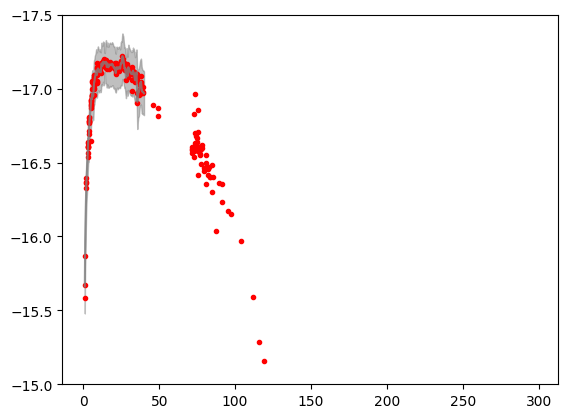

In [68]:
cunt = globals().get('ZTF18abokyfk_rband')
plt.figure()
plt.plot(cunt['tfromexplo_zc'],cunt['absmag'], '.r')

interp_phase_r = interpolate_and_smooth_per_phase(cunt,1,40,20, normalised = False)


h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['smooth_mag'], color = 'grey', alpha = 0.8 )

plt.fill_between(interp_phase_r['t_fromtexp'],
                     interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
                     interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
                 alpha=0.5, color=h[0].get_color())
plt.ylim([-17.5,-15])
plt.gca().invert_yaxis()



## Non normalised magnitude 

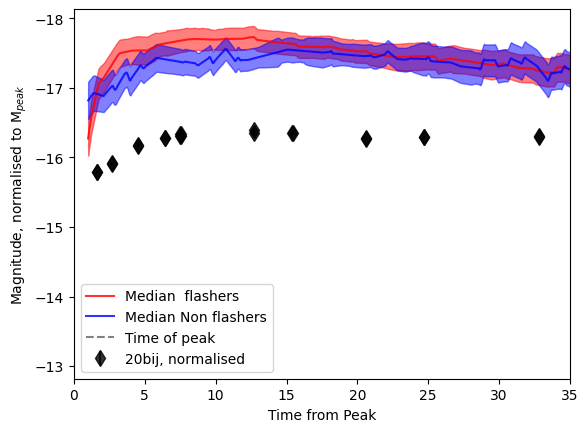

In [69]:
###

plt.figure()


magnis_flash   = Table()
e_magnis_flash = Table()


for _ in Flash['name']:
#     print(_)
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,1,40,10, normalised = False )


      #Collecting the smoothed LCs
    magnis_flash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_flash.add_column(interp_phase_r['smooth_magerr'], name=_)
    

# Making the median LC
median_magnis_flash = []
emed_magnis_flash = []

for i in range(len(magnis_flash)):
    median_magnis_flash.append(np.median(list(magnis_flash[i])))

for i in range(len(e_magnis_flash)):
    emed_magnis_flash.append(np.median(list(e_magnis_flash[i])))


median_flash_LC =  Table([interp_phase_r['t_fromtexp'],median_magnis_flash,emed_magnis_flash],
                         names=['t_fromtexp','absmag','magerr'] )

# peak_time = median_flash_LC[median_flash_LC['absmag']== min(median_flash_LC['absmag'])]['t_fromtexp']

# median_flash_LC['t_frompeak'] = median_flash_LC['t_fromtexp'] - peak_time


r = plt.plot(median_flash_LC['t_fromtexp'], median_flash_LC['absmag'], color = 'red', alpha = 0.8 , label = 'Median  flashers')
plt.fill_between(median_flash_LC['t_fromtexp'],
                median_flash_LC['absmag'] + np.sqrt(median_flash_LC['magerr']),
                median_flash_LC['absmag'] - np.sqrt(median_flash_LC['magerr']), 
                 alpha=0.5, color=r[0].get_color())
 

    
    
    
    
    
###NON FLASHER 

magnis_nflash   = Table()
e_magnis_nflash = Table()

for _ in Nflash['name']:
    
    lc_r = globals().get(_+'_rband')
    
    interp_phase_r = interpolate_and_smooth_per_phase(lc_r,1,40,10,normalised = False)
    
    #Collecting the smoothed LCs
    magnis_nflash.add_column(interp_phase_r['smooth_mag'], name=_)
    e_magnis_nflash.add_column(interp_phase_r['smooth_magerr'], name=_)


    # Plotting all the smoothed LC
#     h = plt.plot(interp_phase_r['t_fromtexp'], interp_phase_r['mag'], color = 'grey', alpha = 0.8 )
#     plt.fill_between(interp_phase_r['t_fromtexp'],
#                      interp_phase_r['smooth_mag'] + np.sqrt(interp_phase_r['smooth_magerr']),
#                      interp_phase_r['smooth_mag'] - np.sqrt(interp_phase_r['smooth_magerr']), 
#                  alpha=0.5, color=h[0].get_color())


# Making the median LC
median_magnis_nflash = []
emed_magnis_nflash = []

for i in range(len(magnis_nflash)):
    median_magnis_nflash.append(np.median(list(magnis_nflash[i])))

for i in range(len(e_magnis_nflash)):
    emed_magnis_nflash.append(np.median(list(e_magnis_nflash[i])))
    

median_Nflash_LC =  Table([interp_phase_r['t_fromtexp'],median_magnis_nflash,emed_magnis_nflash],
                         names=['t_fromtexp','absmag','magerr'] )

# peak_time2 = median_Nflash_LC[median_Nflash_LC['absmag']== min(median_Nflash_LC['absmag'])]['t_fromtexp']

# median_Nflash_LC['t_frompeak'] = median_Nflash_LC['t_fromtexp'] - peak_time2


r = plt.plot(median_Nflash_LC['t_fromtexp'], median_Nflash_LC['absmag'], color = 'blue', alpha = 0.8 , label = 'Median Non flashers')
plt.fill_between(median_Nflash_LC['t_fromtexp'],
                median_Nflash_LC['absmag'] + np.sqrt(median_Nflash_LC['magerr']),
                median_Nflash_LC['absmag'] - np.sqrt(median_Nflash_LC['magerr']), 
                 alpha=0.5, color=r[0].get_color())
 

    
    
#### SONDOS SN
    
plt.errorbar(sondos_21bij['t_fromtexp'], sondos_21bij['absmag'], sondos_21bij['dmag'],
                                                             fmt = 'd', ms = 8,alpha = 0.8, color = 'black',
            label = '20bij, normalised')


plt.axvline(0,ls= '--', color = 'grey',label = 'Time of peak')
    
  
# plt.ylim([-0.3,2.1])    
# plt.xlim([-17,35])   
plt.xlim([0,35])   
plt.gca().invert_yaxis()
plt.xlabel('Time from Peak')
plt.ylabel('Magnitude, normalised to M$_{peak}$')

plt.legend( )
